In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams
from datetime import datetime

In [5]:
os.listdir("../dataset/")

['AirPassengers.csv',
 'Amazon_books_info.xlsx',
 'Big mart sales prediction',
 'bigml_59c28831336c6604c800002a.csv',
 'bizbayadata.csv',
 'Boston housing data',
 'cancer.xlsx',
 'Credit card fraud detection',
 'dataflair_data.csv',
 'data_description.txt',
 'Digits',
 'Employee_Compensation_SF.csv',
 'flights.csv',
 'ganqinwatches.xlsx',
 'iris',
 'KNN.xlsx',
 'Link prediction on hikes network',
 'loan_prediction_problem',
 'manish_data.xlsx',
 'PickUp.csv',
 'pixel.xlsx',
 'pokemon.xlsx',
 'salesprice.xlsx',
 'sample_submission.csv',
 'sentiment.csv',
 'similar_posts.csv',
 'students.xlsx',
 'Telco-Customer-Churn.csv',
 'test.csv',
 'Time series forecasting',
 'Topics.csv',
 'train.csv',
 'vehicledatabase.xlsx',
 'Worksheet in Presentation2.xlsx']

In [6]:
rcParams["figure.figsize"]=15,6

In [71]:
data=pd.read_csv("../dataset/AirPassengers.csv")

In [29]:
print(data.head(10))
print()
print("column name : data type")
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
5  1949-06          135
6  1949-07          148
7  1949-08          148
8  1949-09          136
9  1949-10          119

column name : data type
Month          object
#Passengers     int64
dtype: object


In [95]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data=pd.read_csv("../dataset/AirPassengers.csv",parse_dates=["Month"],date_parser=dateparse,index_col="Month")
#data["Month"]=pd.to_datetime(data.Month,format="%Y-%m")   second way of converting datatime object
#data=data.set_index("Month")                              second way of setting index

In [96]:
print(data.head(10))
print()
print("colname  :  data type")
print(data.dtypes)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119

colname  :  data type
#Passengers    int64
dtype: object


A time series is said to be stationary if its statistical properties is said to be constant (contant mean, constant variance, an auto-covariance that is not depended on time).

But why it is important for a time series to be stationary?
#1 Theories related to stationary time series are more mature and easier to implement then non stationary time series.
#2 Time series is made stationary to make the variables independent. Variable can be dependent in many ways but independent in only one way, therefore if a variable is independent it will impart more information.

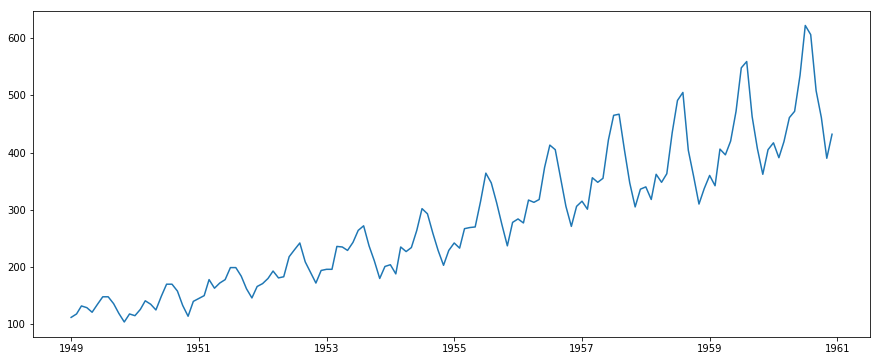

In [83]:
plt.plot(data)

there are 2 ways to check stationary of a time series
#1.ploting rolling statistics
#2.dicky-fuller test

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


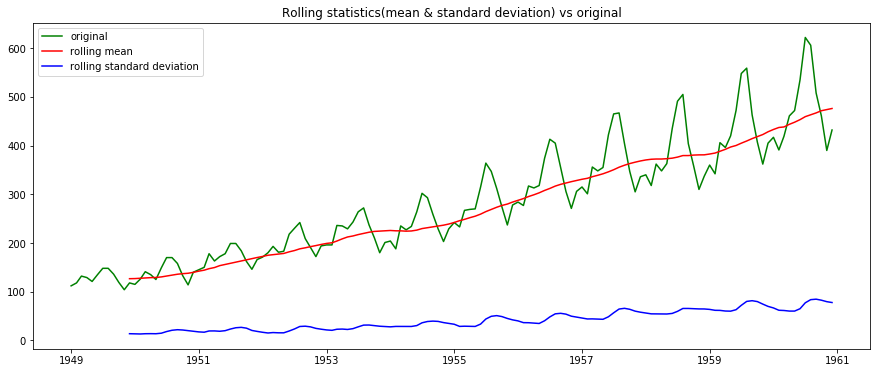

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [182]:
from statsmodels.tsa.stattools import adfuller



ts=data["#Passengers"]
def test_stationry(data):    
    #1.rolling statsistics test
    rol_mean=pd.rolling_mean(data,window=12)
    rol_std=pd.rolling_std(data,window=12)
    ori=plt.plot(data,"green",label="original")
    mean=plt.plot(rol_mean,"red",label="rolling mean")
    std=plt.plot(rol_std,"blue",label="rolling standard deviation")
    plt.legend(loc="best")
    plt.title("Rolling statistics(mean & standard deviation) vs original")
    plt.show()

    #2. Dicky-fuller test
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
test_stationry(ts)

result:
#1. the variation in standard deviation is almost constant and small,but there is significant variation in mean and this in indictitive of non constant mean and thus non stationrity.

#2. test statistic is smaller then the p value , thus we reject the null hypothesis that the time series is stationary


-----------------------------------------------------------

The basic idea is to to remove trend and seasonality for making times series stationary,then apply some forecastig technique, apply trend and seasonality to forescasted value to bring it back to the original scale  

In [156]:
#estimating and eliminating trend

In [157]:
#any kind of transforamtion (log,square,square root) can be used to scaled the time series, log transformation is used below
log_tranf=np.log(data["#Passengers"])

Text(0.5,1,'time series after log transformation')

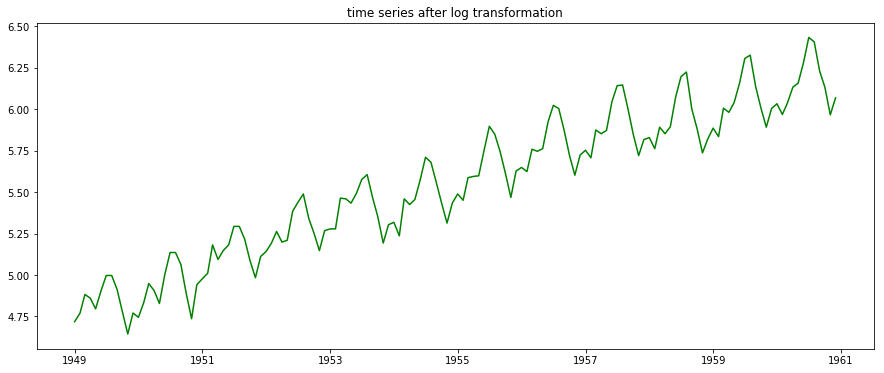

In [168]:
plt.plot(log_tranf,"green")
plt.title("time series after log transformation")

there is clear forward trend in the data, but to make it more intutive noise can be removed.

there are various ways to remove noise, they are 
#1. Aggregation – taking average for a time period like monthly/weekly averages
#2. Smoothing – taking rolling averages
#3. Polynomial Fitting – fit a regression model


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


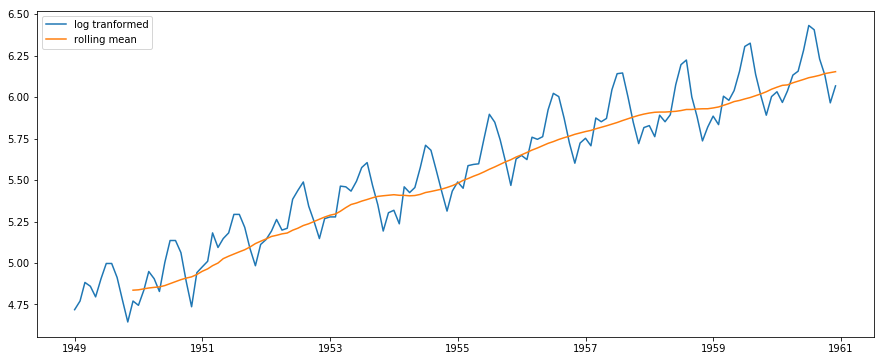

In [185]:
# Moving Average
log_trans_moving_average=pd.rolling_mean(log_tranf,12)
plt.plot(log_tranf,label="log tranformed")
plt.plot(log_trans_moving_average,label="rolling mean")
plt.legend()
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


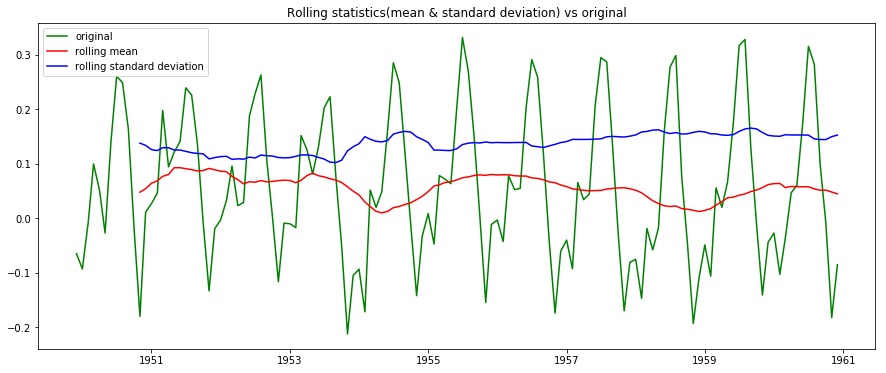

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [194]:
log_trans_diff_log_trans_roll_mean=log_tranf-log_trans_roll_mean
log_trans_diff_log_trans_roll_mean.dropna(inplace=True)
test_stationry(log_trans_diff_log_trans_roll_mean)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


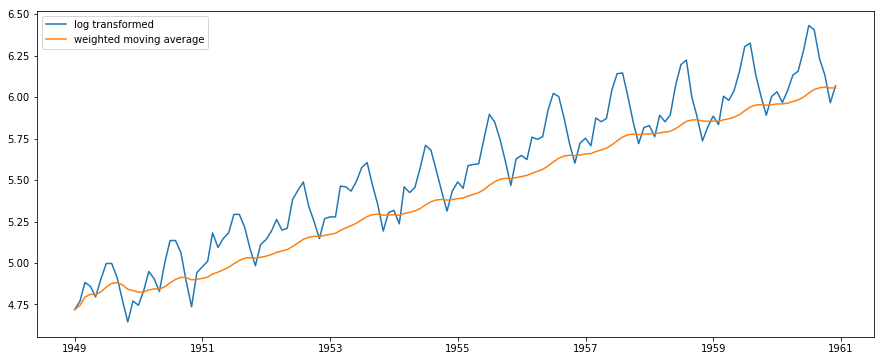

In [191]:
#weigthed moving average
log_trans_weighted_average=pd.ewma(log_tranf,halflife=12)
plt.plot(log_tranf,label="log transformed")
plt.plot(log_trans_weighted_average,label="weighted moving average")
plt.legend()
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


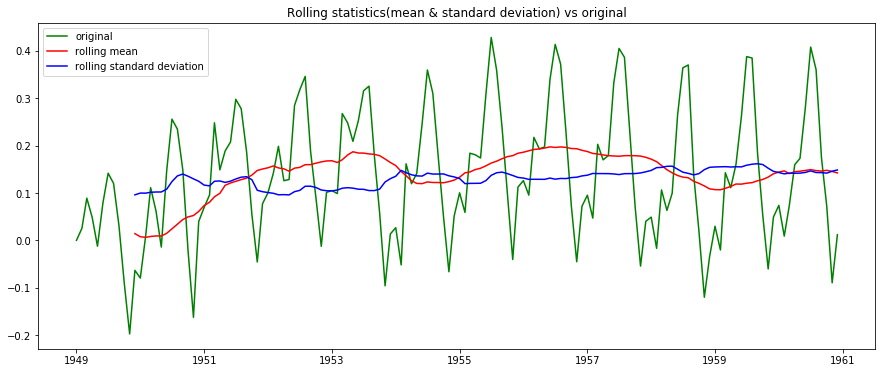

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [196]:
log_trans_diff_log_trans_weighted_average=log_tranf-log_trans_weighted_average
test_stationry(log_trans_diff_log_trans_weighted_average)

above mentioned to eliminate trend does not work in all cases especially in the presence of high seasonality, hence some advance techniques are used, which eliminate trend and seasonality.

they are:
#1.Differencing – taking the differece with a particular time lag
#2.Decomposition – modeling both trend and seasonality and removing them from the model.

In [197]:
#eliminating trend and seasonality

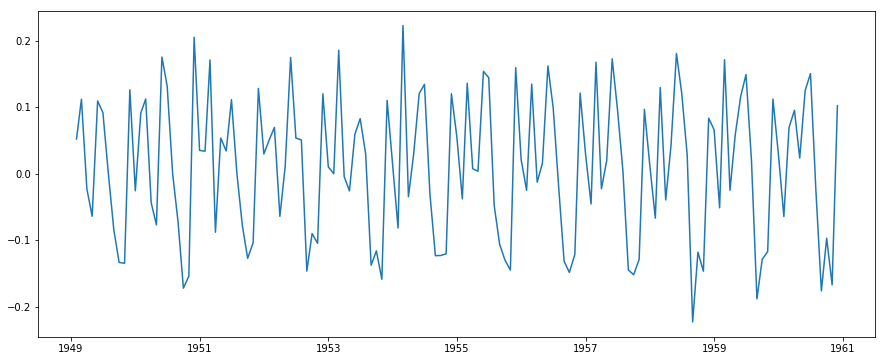

In [201]:
#differencing
log_trans_diff=log_tranf-log_tranf.shift()
plt.plot(log_trans_diff)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


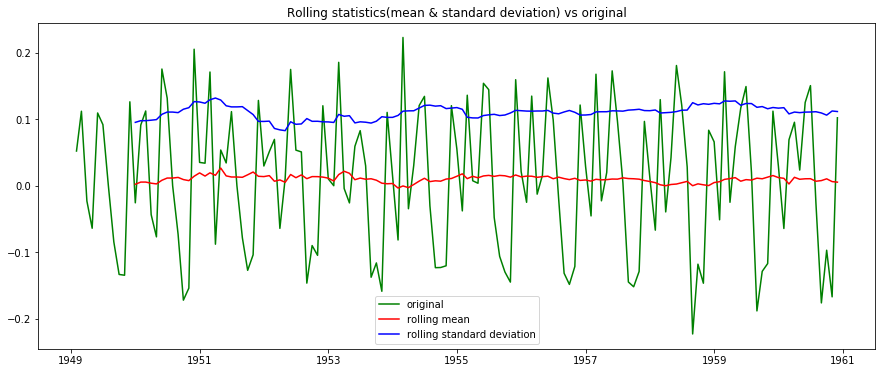

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [202]:
log_trans_diff.dropna(inplace=True)
test_stationry(log_trans_diff)

In [ ]:
#1 from the plot the mean and standard deviation is almost constant
#2 according to dicky fuller the test stastistic is less then 10% critical value i.e we can say that the time series is
# stationary with 90% confidence interval

In [207]:
#decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion=seasonal_decompose(log_tranf)
original=decompostion.observed
trend=decompostion.trend
seasonal=decompostion.seasonal
residual=decompostion.resid

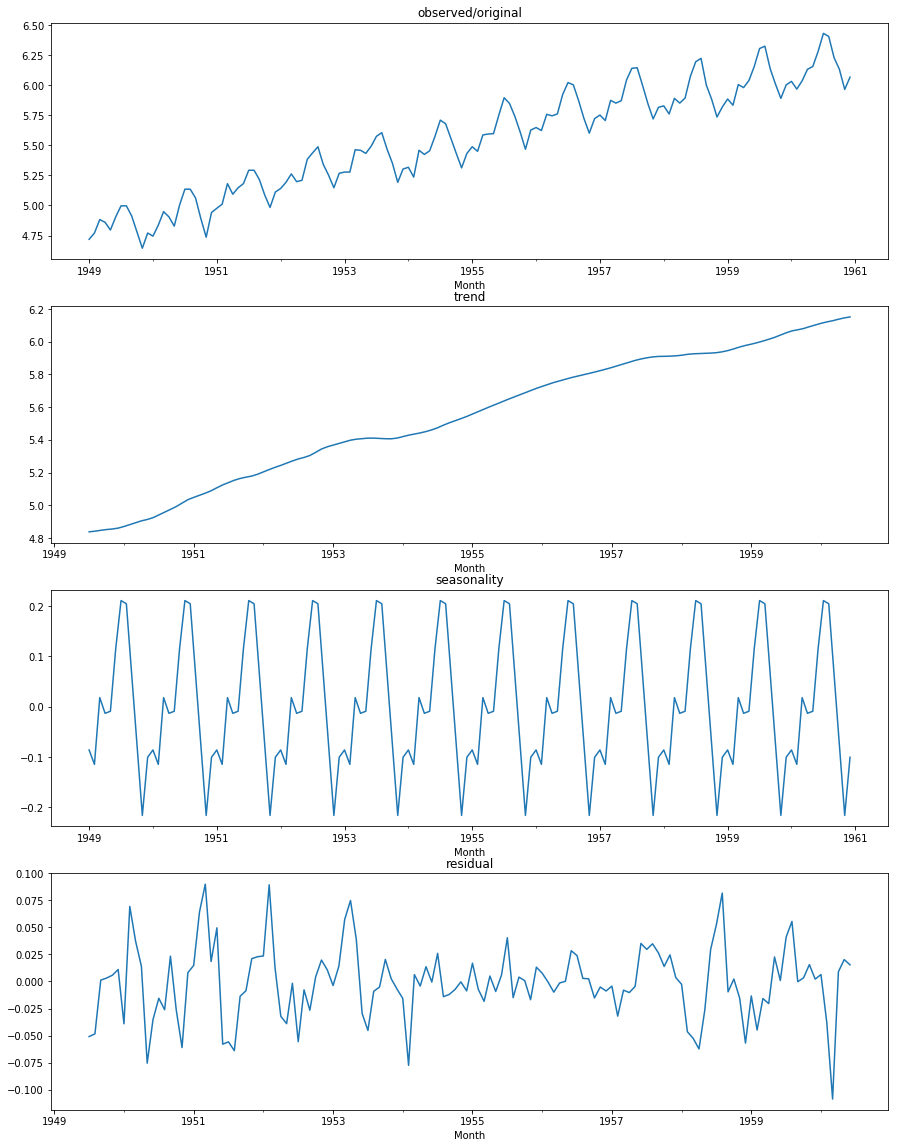

In [253]:
fig, ax= plt.subplots(figsize=(15,20),nrows=4,ncols=1)

original.plot(title="observed/original",ax=ax[0])

trend.plot(title="trend",ax=ax[1])

seasonal.plot(title="seasonality",ax=ax[2])

residual.plot(title="residual",ax=ax[3])


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  if __name__ == '__main__':


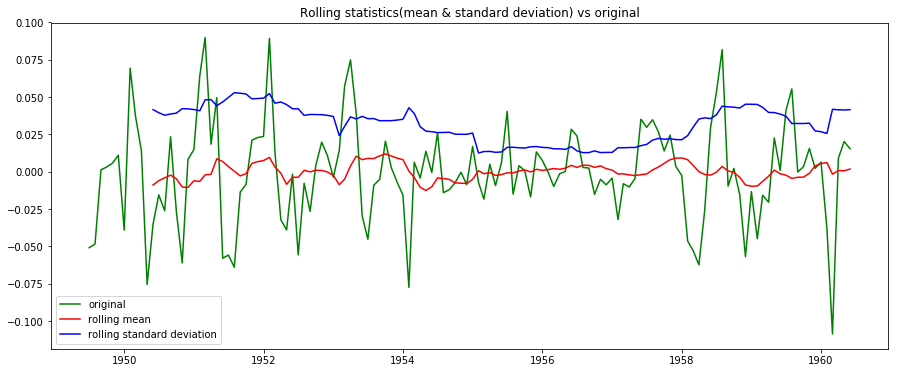

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [257]:
log_trans_decompose=residual
log_trans_decompose.dropna(inplace=True)
test_stationry(log_trans_decompose)

In [258]:
#1 the plot of decomposed time series shows the mean and standard deviation are constant just like previous techniques.
#2 but according to dickey fuller technique the test shows the time series is stationary with 99 % confidence.

forecasting time series

In [265]:
#ACF AND PACF plots
from statsmodels.tsa.stattools import acf,pacf
acf_plot=acf(log_trans_diff,nlags=20)
pacf_plot=pacf(log_trans_diff,nlags=20,method="ols")

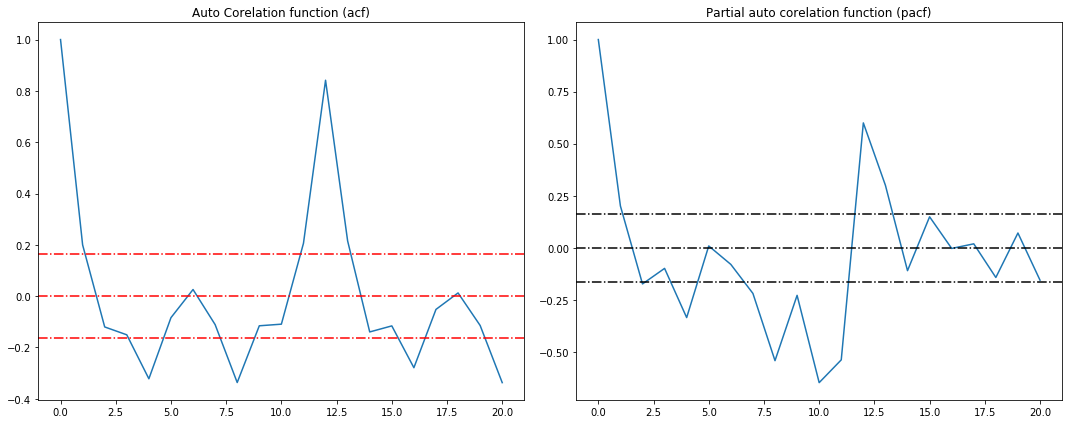

In [287]:
#ACF plot
plt.subplot(121)
plt.plot(acf_plot)
plt.axhline(y=0,linestyle="dashdot",c="red")
plt.axhline(y=1.96/np.sqrt(len(log_trans_diff)),linestyle="dashdot",c="red")
plt.axhline(y=-1.96/np.sqrt(len(log_trans_diff)),linestyle="dashdot",c="red")
plt.title("Auto Corelation function (acf)")


plt.subplot(122)
plt.plot(pacf_plot)
plt.axhline(y=0,linestyle="dashdot",c="black")
plt.axhline(y=1.96/np.sqrt(len(log_trans_diff)),linestyle="dashdot",c="black")
plt.axhline(y=-1.96/np.sqrt(len(log_trans_diff)),linestyle="dashdot",c="black")
plt.title("Partial auto corelation function (pacf)")
plt.tight_layout()

In [288]:
#based on the plots 
#in pacf plot the  upper line is cut at 2 therefor p=2
#in acf plot the upper line is cut at 2 therefor q=2

In [291]:
from statsmodels.tsa.arima_model import ARIMA

In [294]:
AR.fit?

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


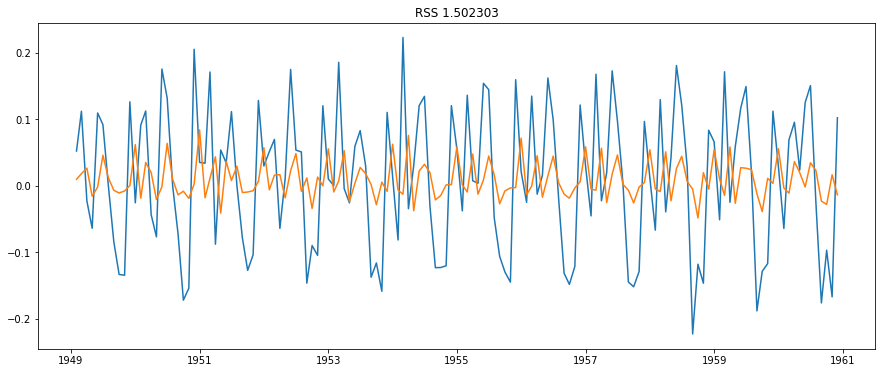

In [307]:
#AR
AR=ARIMA(log_tranf,order=(2,1,0))
result_AR=AR.fit()


plt.plot(log_trans_diff)
plt.plot(result_AR.fittedvalues)
plt.title("RSS %f"%sum((log_trans_diff-result_AR.fittedvalues)**2))
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


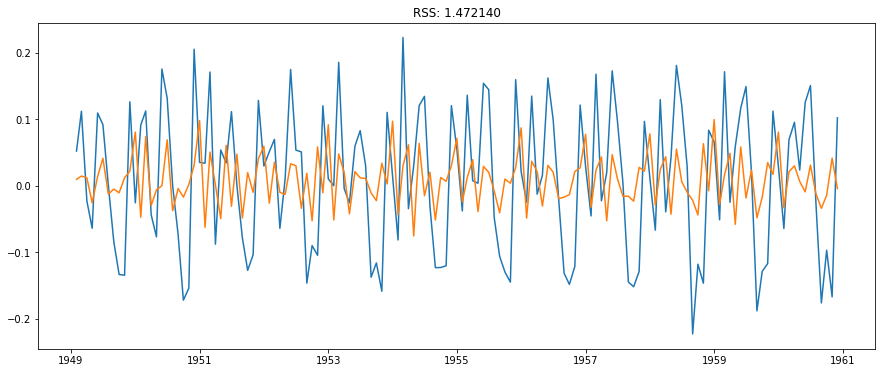

In [310]:
#MA
MA=ARIMA(log_tranf, order=(0,1,2))
result_MA=MA.fit()
plt.plot(log_trans_diff)
plt.plot(result_MA.fittedvalues)
plt.title("RSS: %f"%sum((log_trans_diff-result_MA.fittedvalues)**2))
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.029152')

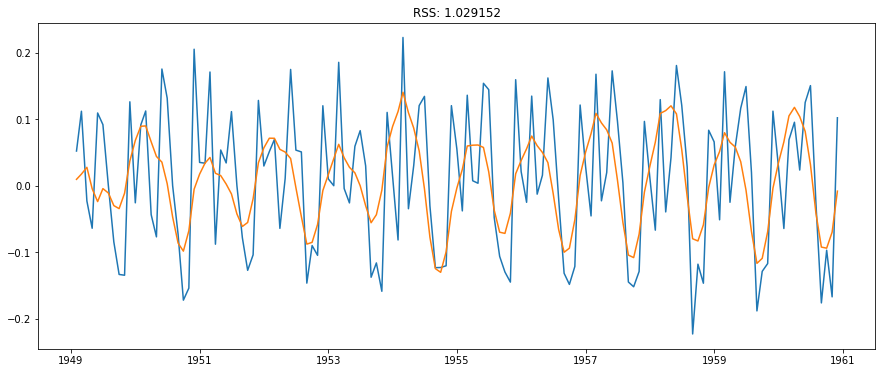

In [326]:
#COMBINED
COMBINED=ARIMA(log_tranf,order=(2,1,2))
result_combined=COMBINED.fit()
plt.plot(log_trans_diff)
plt.plot(result_combined.fittedvalues)
plt.title("RSS: %f"%sum((log_trans_diff-result_combined.fittedvalues)**2))

In [338]:
#taking back to original scale

forecast_data=pd.Series(result_combined.fittedvalues)

In [339]:
forecast_data.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [340]:
forecast_data_cumsum=forecast_data.cumsum()

In [354]:
print("predicted data:",forecast_data_cumsum.head())
print()
print("log transformed data:",log_tranf.head())

predicted data: Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

log transformed data: Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64


In [355]:
log_forecast_data=pd.Series(log_tranf.ix[0],index=log_tranf.index)


log_forecast_data=log_forecast_data.add(forecast_data_cumsum,fill_value=0)

log_forecast_data.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

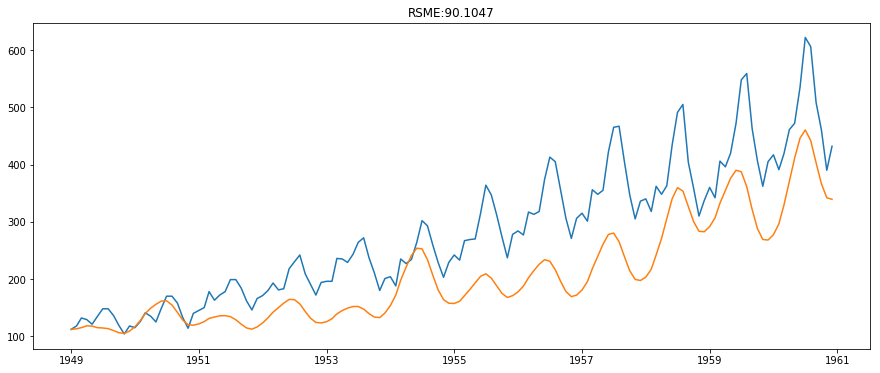

In [362]:
forecast_data=np.exp(log_forecast_data)
plt.plot(data["#Passengers"])
plt.plot(forecast_data)
plt.title("RSME:%.4f"%np.sqrt(sum((forecast_data-data["#Passengers"])**2)/len(data)))
plt.show()
